In [ ]:
install.packages("Rcpp")
install.packages("testthat")
install.packages("roxygen2")
install.packages("spatstat")

In [1]:
require(devtools)
require(Rcpp)
require(BH)
require(testthat)

Loading required package: devtools
Loading required package: Rcpp
Loading required package: BH
Loading required package: testthat

Attaching package: ‘testthat’

The following object is masked from ‘package:devtools’:

    setup



In [2]:
options(unzip = "internal")
devtools::install_github("YegorGalkin/RcppSim",quick=TRUE,local=FALSE)

In [5]:
require(MathBioSim)

scales=10^(0:150/50)

areas=scales

pop<-list()

time_start<-Sys.time()

for(i in 1:length(scales)){
  
x_grid=(0:1000)/1000*0.002*scales[i]*10 
  
death_kernel=dnorm(x_grid,sd=0.001*scales[i])

birth_kernel=dnorm(x_grid,sd=0.002*scales[i])

params<-list("area_length_x"=areas[i],    
             "cell_count_x"=100,  
             
             "b"=0.3,    
             "d"=0,    
             "dd"=0.01*scales[i], 
             
             "seed"=1234,  
             "init_density"=100/scales[i],
             
             "death_kernel_x"=x_grid,
             "death_kernel_y"=death_kernel,
             
             "birth_kernel_x"=x_grid,
             "birth_kernel_y"=birth_kernel, 
             
             "spline_precision" = 1e-6  
)
sim<-new(poisson_1d,params)
pop[[i]]<-numeric(100000)
for(j in 1:(100000)){
  sim$make_event()
  pop[[i]][j]=sim$total_population
}
message(paste(i,"done"))
}

time_end<-Sys.time()
time_end-time_start

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123 done
1

Time difference of 28.69511 mins

In [19]:
require(ggplot2)
require(dplyr)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:testthat’:

    matches

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
mean_pop<-pop%>%sapply(function(x){x%>%tail(50000)%>%mean()})

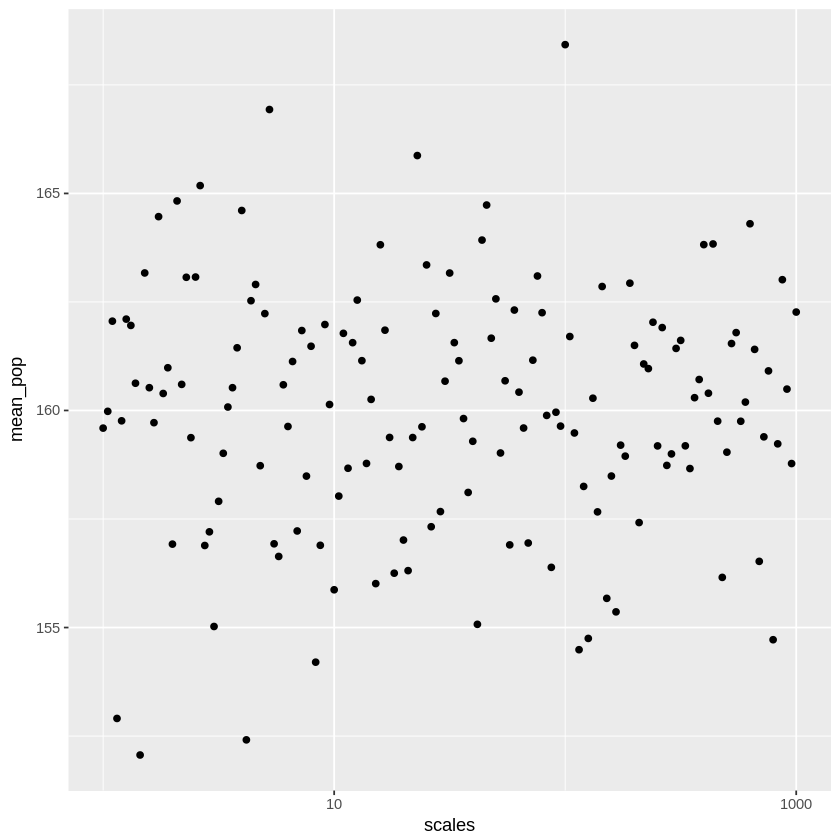

In [8]:
ggplot(data=data.frame(scales=scales,mean_pop=mean_pop),aes(x=scales,y=mean_pop))+geom_point()+scale_x_log10()

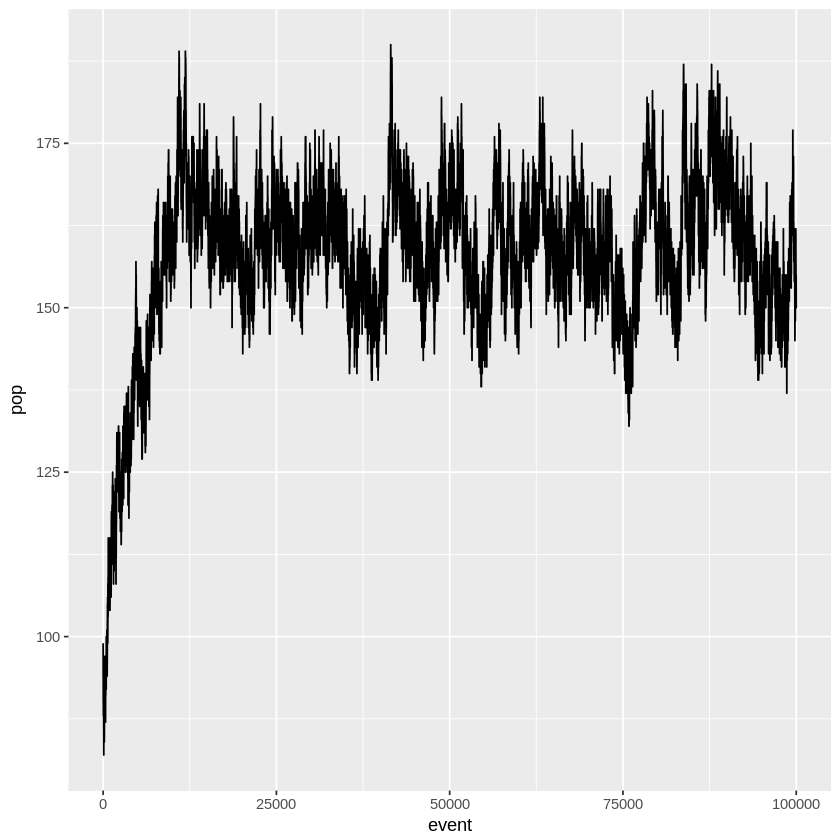

In [9]:
#First simulation
ggplot(data=data.frame(event=1:100000,pop=pop[[1]]),aes(x=event,y=pop))+geom_line()

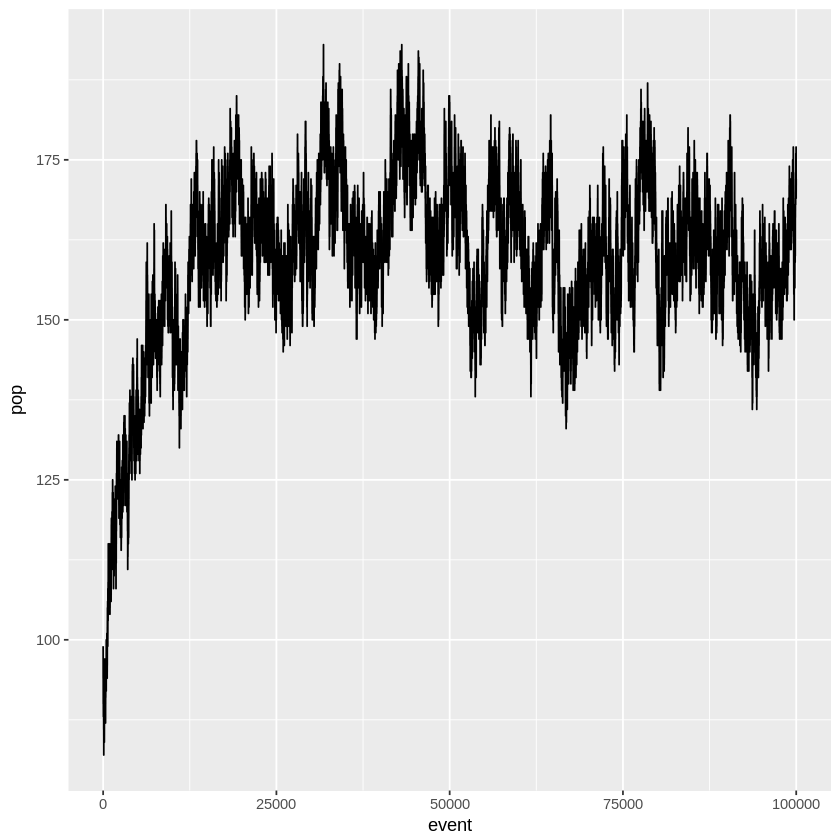

In [10]:
#Fiftieth simulation
ggplot(data=data.frame(event=1:100000,pop=pop[[50]]),aes(x=event,y=pop))+geom_line()

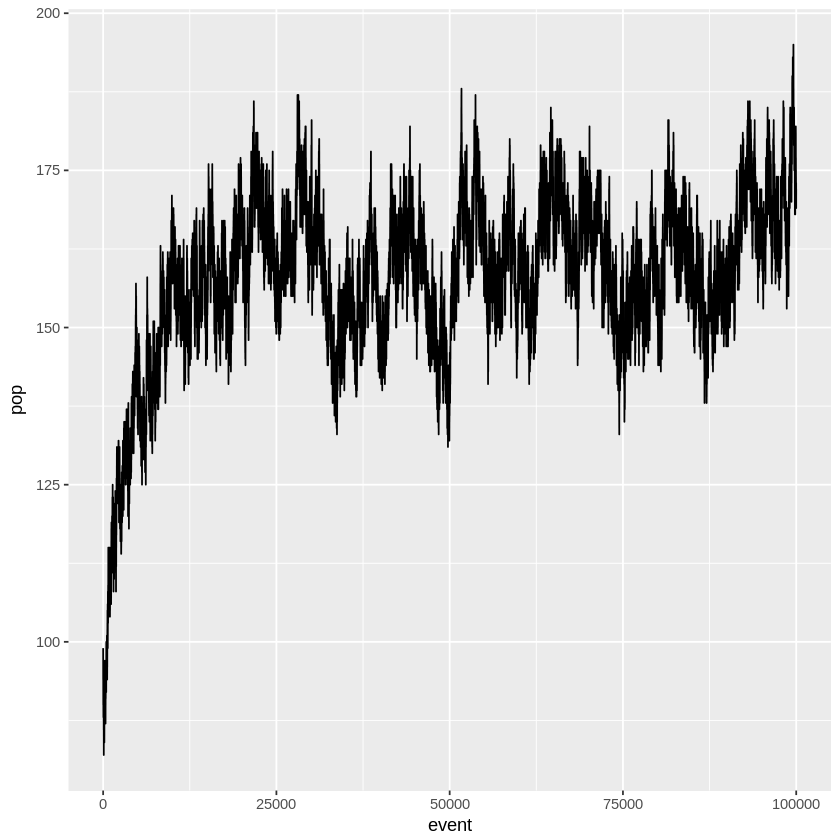

In [11]:
#Last simulation
ggplot(data=data.frame(event=1:100000,pop=pop[[151]]),aes(x=event,y=pop))+geom_line()

In [20]:
plot_ith_density=function(i){
    death_kernel=dnorm(x_grid,sd=0.001*scales[i])
    birth_kernel=dnorm(x_grid,sd=0.002*scales[i])

params<-list("area_length_x"=areas[i],    
             "cell_count_x"=100,  
             
             "b"=0.3,    
             "d"=0,    
             "dd"=0.01*scales[i], 
             
             "seed"=1234,  
             "init_density"=100/scales[i],
             
             "death_kernel_x"=x_grid,
             "death_kernel_y"=death_kernel,
             
             "birth_kernel_x"=x_grid,
             "birth_kernel_y"=birth_kernel, 
             
             "spline_precision" = 1e-6  
)
sim<-new(poisson_1d,params)

all_coords<-list()

for(j in 1:(100000)){
  sim$make_event()
  if(j%%1000==0) all_coords[[j%/%1000]]<-sim$get_all_coordinates()
}
ggplot(data=data.frame(coords=unlist(all_coords%>%tail(50))),aes(coords))+geom_histogram(bins=60)
}

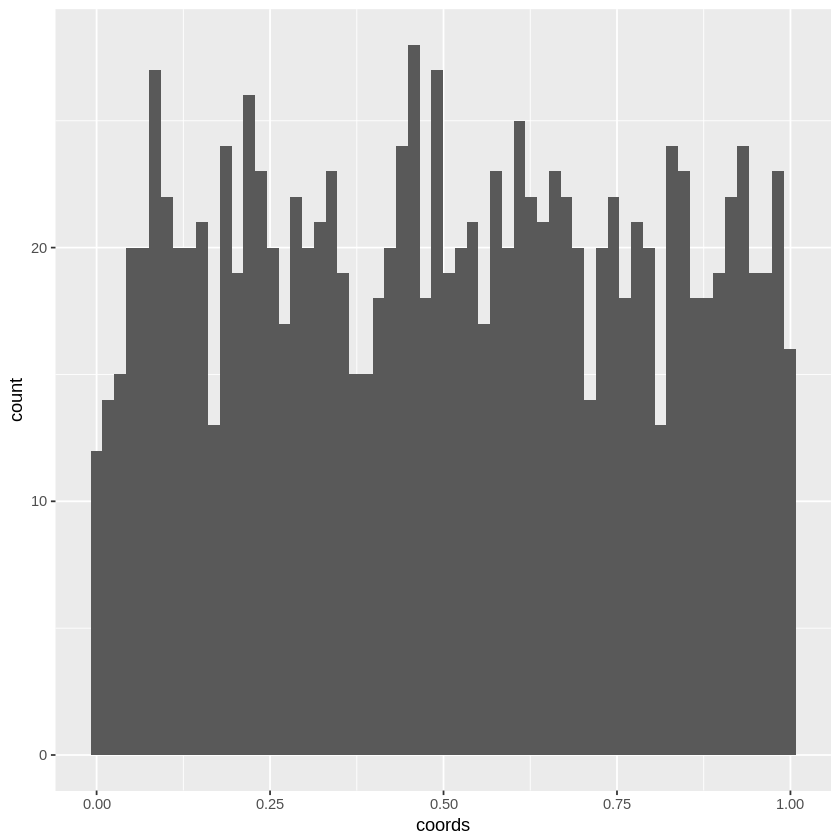

In [21]:
plot_ith_density(1)

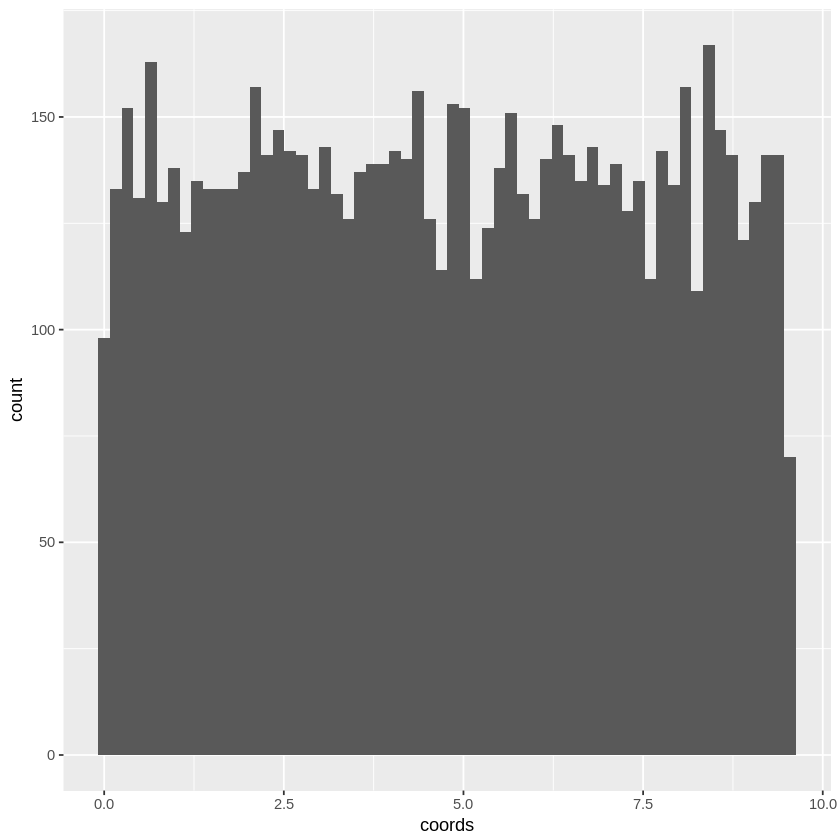

In [22]:
plot_ith_density(50)

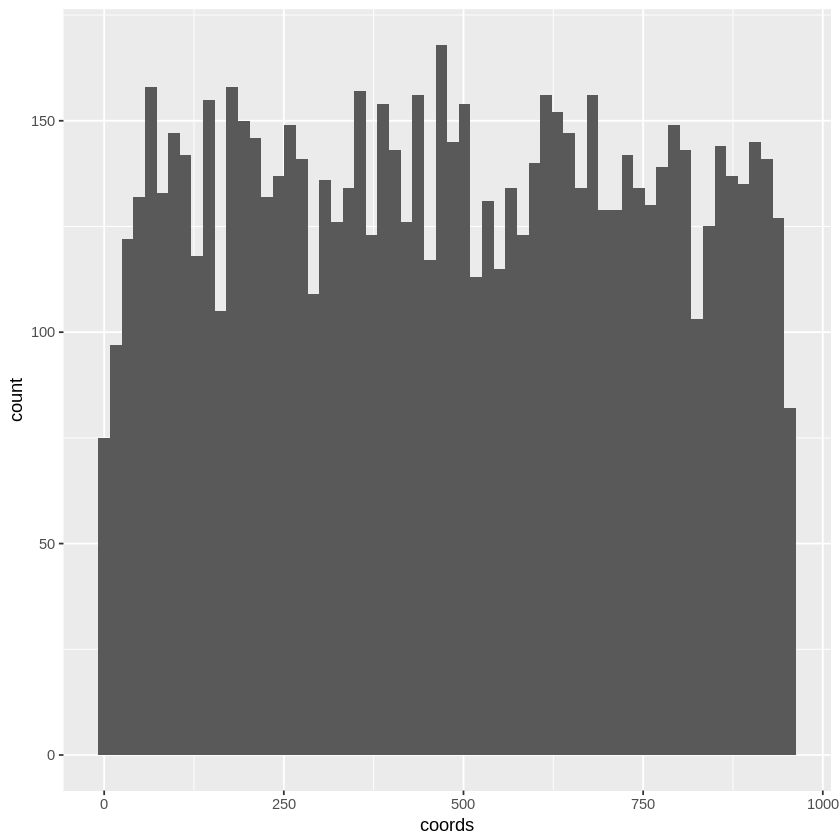

In [23]:
plot_ith_density(150)

In [25]:
scales=10^(0:100/50)

areas=scales

pop<-list()

time_start<-Sys.time()

for(i in 1:length(scales)){
  
x_grid=(0:1000)/1000*0.002*10 
  
death_kernel=dnorm(x_grid,sd=0.001)

birth_kernel=dnorm(x_grid,sd=0.002)

params<-list("area_length_x"=areas[i],    
             "cell_count_x"=100,  
             
             "b"=0.3,    
             "d"=0,    
             "dd"=0.01, 
             
             "seed"=1234,  
             "init_density"=100,
             
             "death_kernel_x"=x_grid,
             "death_kernel_y"=death_kernel,
             
             "birth_kernel_x"=x_grid,
             "birth_kernel_y"=birth_kernel, 
             
             "spline_precision" = 1e-6  
)
sim<-new(poisson_1d,params)
pop[[i]]<-numeric(100000*sqrt(scales[i]))
for(j in 1:(100000*sqrt(scales[i]))){
  sim$make_event()
  pop[[i]][j]=sim$total_population
}
message(paste(i,"done"))
}

time_end<-Sys.time()
time_end-time_start

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done


Time difference of 1.512659 hours

In [26]:
mean_pop<-pop%>%sapply(function(x){x%>%tail(50000)%>%mean()})

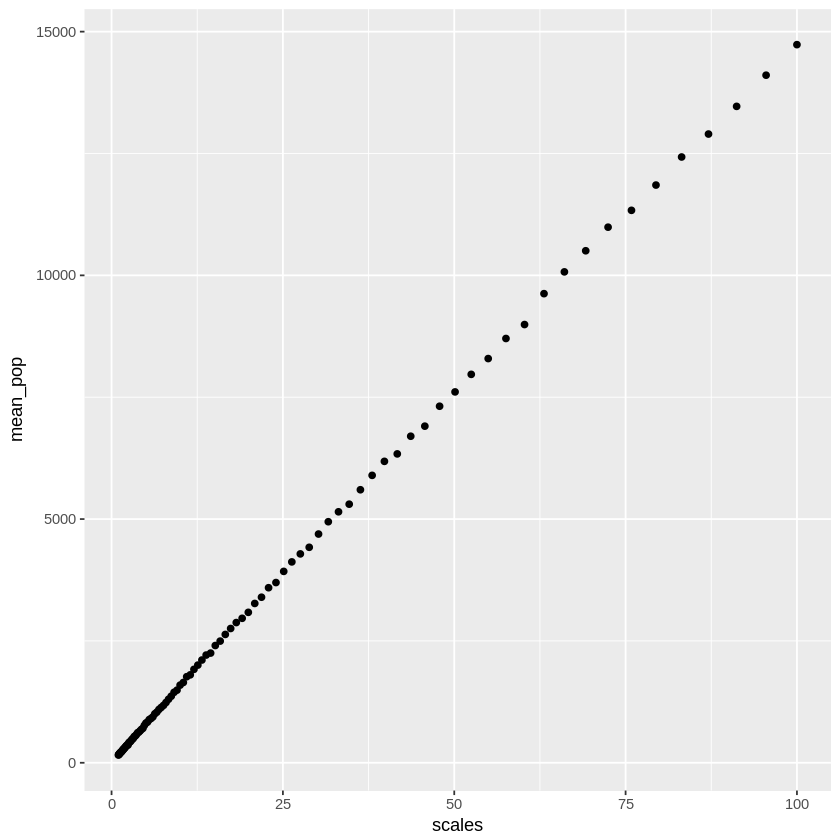

In [27]:
ggplot(data=data.frame(scales=scales,mean_pop=mean_pop),aes(x=scales,y=mean_pop))+geom_point()

In [28]:
lm(mean_pop~scales-1)


Call:
lm(formula = mean_pop ~ scales - 1)

Coefficients:
scales  
 150.7  


In [29]:
install.packages("spatstat")

also installing the dependencies ‘spatstat.data’, ‘spatstat.utils’, ‘mgcv’, ‘deldir’, ‘tensor’, ‘polyclip’, ‘goftest’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Warning message:
“data contain duplicated points”

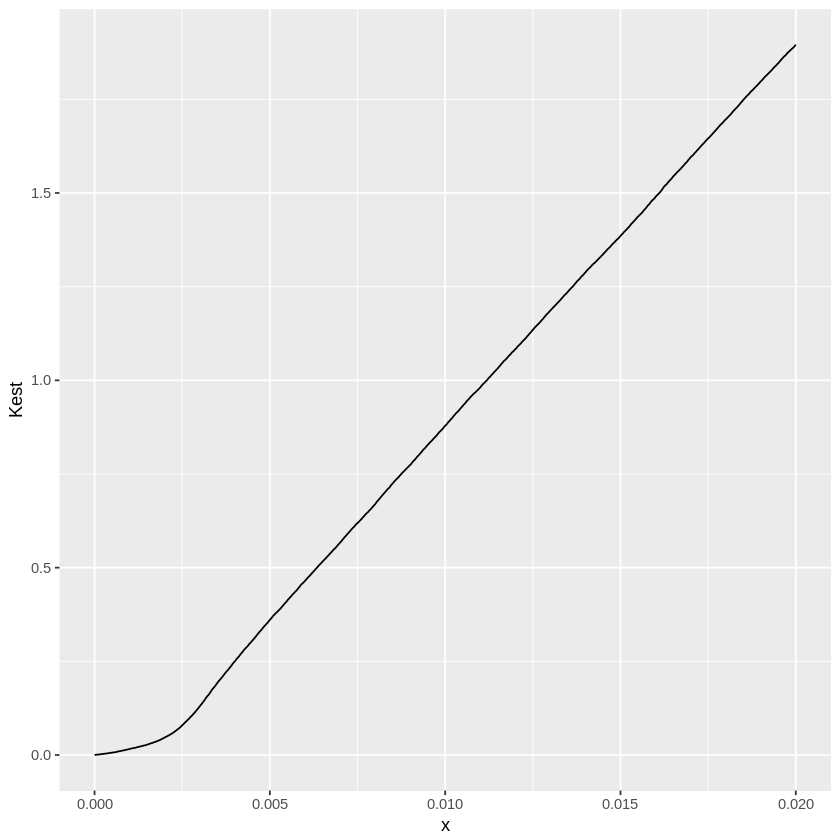

In [32]:
require(spatstat)
points<-unique.ppp(ppp(sim$get_all_coordinates(),rep(0,sim$total_population),c(0,100),c(-50,50)))

K_estimate<-Kest(points,r=x_grid,correction="Ripley")

ggplot(data=data.frame(Kest=K_estimate$iso/2,x=x_grid),aes(x=x,y=Kest))+geom_line()

Warning message:
“Removed 1 rows containing missing values (geom_path).”

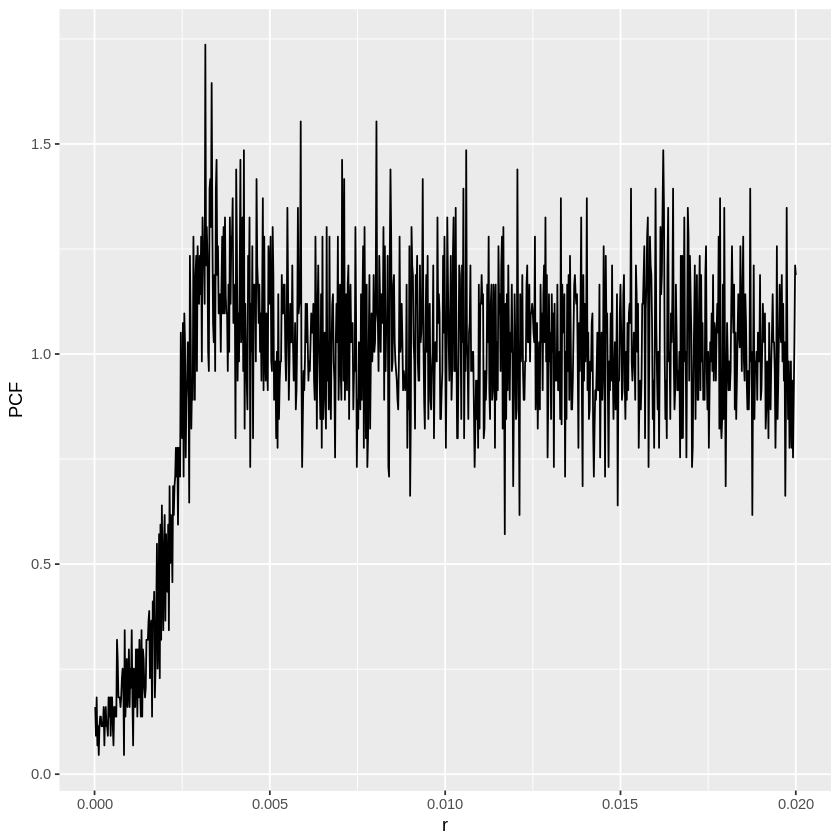

In [34]:
pcf_estimate=data.frame(Kest=K_estimate$iso/2,x=x_grid)%>%
  mutate(pfc=(Kest-lag(Kest))/(x_grid-lag(x_grid))/sim$area_length_x)

ggplot(data=pcf_estimate,aes(x=x,y=pfc))+geom_line()+
  labs(x="r",y="PCF")